In [1]:

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.metrics import AUC
from tensorflow import keras

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from imblearn.pipeline import Pipeline as smote_pipeline

import joblib


In [3]:
df = pd.read_csv('../data/clean_data.csv')
df

,body_length,country,currency,delivery_method,description,fb_published,has_analytics,has_header,has_logo,listed,...,total_tickets_available,number_of_payouts,avg_quantity_sold,payee_name_in_org_name,venue_country_is_source_country,avg_cost_per_ticket,days_to_event,event_length,pop_country,fraud
0,3852.0,US,USD,0.0,0.723935,0,0,1.0,0,y,...,920.0,0.0,0.000000,True,True,0.226449,33.0,0.0,True,True
1,3499.0,US,USD,1.0,0.091689,0,0,0.0,1,n,...,100.0,49.0,12.500000,True,True,0.350000,28.0,0.0,True,False
2,2601.0,US,USD,1.0,0.095273,0,0,NaN,0,y,...,48.0,36.0,48.000000,True,True,1.948125,53.0,0.0,True,False
3,12347.0,IE,EUR,1.0,0.293555,0,0,0.0,1,y,...,30000.0,21.0,9.666667,True,False,0.000456,0.0,322.0,False,False
4,2417.0,US,USD,0.0,0.308245,1,0,0.0,0,y,...,264.0,49.0,4.875000,False,True,0.385417,63.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,667.0,US,USD,0.0,0.966564,0,0,NaN,1,n,...,400.0,0.0,0.000000,True,True,0.112500,10.0,0.0,True,True
14333,5812.0,US,USD,1.0,0.007159,0,0,1.0,0,y,...,3256.0,5.0,78.500000,False,True,0.013283,55.0,0.0,True,False
14334,557.0,NaN,USD,0.0,0.202241,1,0,0.0,1,y,...,148.0,1.0,0.200000,True,False,0.283784,89.0,0.0,False,False
14335,10873.0,US,USD,0.0,0.042906,0,0,0.0,1,y,...,100.0,128.0,0.000000,True,True,0.793300,5.0,0.0,True,False


In [4]:
pipe = joblib.load('../models/prediction_pipe.joblib')
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['body_length', 'description',
                                                   'name_length', 'num_payouts',
                                                   'user_age',
                                                   'avg_ticket_price',
                                                   'total_tickets_available',
                                                   'number_of_payouts',
                                                   'avg_quantity_sold',
                                                   'avg_cost_per_ticket',
                                                   'days_to_event',
                                                   'even...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'currency',
                                                   'delivery_method',
                                                   'fb_published',
                                                   'has_analytics',
                                                   'has_header', 'has_logo',
                                                   'listed', 'payout_type',
                                                   'show_map', 'venue_country',
                                                   'venue_state',
                                                   'payee_name_in_org_name',
                                                   'venue_country_is_source_country',
                                                   'pop_country'])])),
                ('smoter', SMOTE(n_jobs=-1)),
                ('cls', RandomForestClassifier(n_estimators=1000, n_jobs=-1))])

In [5]:
trans = pipe[:-1]
trans

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['body_length', 'description',
                                                   'name_length', 'num_payouts',
                                                   'user_age',
                                                   'avg_ticket_price',
                                                   'total_tickets_available',
                                                   'number_of_payouts',
                                                   'avg_quantity_sold',
                                                   'avg_cost_per_ticket',
                                                   'days_to_event',
                                                   'even...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'currency',
                                                   'delivery_method',
                                                   'fb_published',
                                                   'has_analytics',
                                                   'has_header', 'has_logo',
                                                   'listed', 'payout_type',
                                                   'show_map', 'venue_country',
                                                   'venue_state',
                                                   'payee_name_in_org_name',
                                                   'venue_country_is_source_country',
                                                   'pop_country'])])),
                ('smoter', SMOTE(n_jobs=-1))])

In [6]:
X = df.drop('fraud', axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   stratify=y)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11469 entries, 7526 to 11897
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   body_length                      11469 non-null  float64
 1   country                          11147 non-null  object 
 2   currency                         11469 non-null  object 
 3   delivery_method                  11456 non-null  float64
 4   description                      11469 non-null  float64
 5   fb_published                     11469 non-null  int64  
 6   has_analytics                    11469 non-null  int64  
 7   has_header                       7102 non-null   float64
 8   has_logo                         11469 non-null  int64  
 9   listed                           11469 non-null  object 
 10  name_length                      11469 non-null  float64
 11  num_payouts                      11469 non-null  float64
 12  payout_type    

In [ ]:
pipe.fit_resample(X_train, y_train)


In [ ]:
X_train_sm, y_train_sm = trans.fit_resample(X_train, y_train)
X_train_sm.shape

In [ ]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_sm, y_train_sm, test_size=0.20)

In [ ]:
(y_train.value_counts()/y_train.shape[0]).values

In [ ]:
def model(num_hidden_nodes=64):
    nn = Sequential()
    nn.add(Dense(num_hidden_nodes, activation='relu', input_dim=563))
    nn.add(Dropout(rate=.05))
    nn.add(Dense(num_hidden_nodes, activation='relu'))
    nn.add(Dropout(rate=.10))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=[AUC()])
    return nn


In [ ]:
clf = KerasClassifier(model, epochs=50, batch_size=10, verbose=1)

In [ ]:
weights = (y_train.value_counts()/y_train.shape[0]).values
class_weights = {0: weights[0],
                1: weights[1]}

history = clf.fit(trans[:-1].transform(X_train).toarray(), y_train, validation_split=0.2, class_weight=class_weights)

In [ ]:
X_test_processed = trans[:-1].transform(X_test)

In [ ]:
test_predictions = clf.predict(X_test_processed)

In [ ]:
print(f1_score(y_test, test_predictions))
print(roc_auc_score(y_test, test_predictions))

In [ ]:
from imblearn.keras import BalancedBatchGenerator
from imblearn.under_sampling import NearMiss


In [ ]:
X_train_transformed = trans[:-1].transform(X_train).toarray()
y_train_transformed = y_train.values.reshape(-1, 1)

model = keras.Sequential([
    Dense(64, activation='relu', input_dim=563),
    Dropout(rate=.25),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001),
             metrics=[AUC()])
model.fit(X_train_transformed, y_train_transformed, epochs=50, batch_size=10)

In [7]:
neg, pos = np.bincount(y_train)
total = neg + pos
print(f'Examples:\n    Total: {total}\n    Positive: {pos} {100*pos/total:.2f}% of total')

Examples:
    Total: 11469
    Positive: 1034 9.02% of total


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [12]:
trans_wo_smote = trans[:-1]
train_features = trans_wo_smote.fit_transform(X_train)
val_features = trans_wo_smote.transform(X_val)
test_features = trans_wo_smote.transform(X_test)

train_features = np.clip(train_features.toarray(), -5, 5)
val_features = np.clip(val_features.toarray(), -5, 5)
test_features = np.clip(test_features.toarray(), -5, 5)


In [13]:
train_features.shape

(9175, 520)

In [44]:
METRICS = [
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        Dense(32, activation='relu', input_shape=(train_features.shape[1],)),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid', bias_initializer=output_bias)
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=metrics)
    
    return model


In [45]:
EPOCHS=100
BATCH_SIZE=1835

early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_auc',
        verbose=1,
        patience=10,
        mode='max',
        restore_best_weights=True)

model = make_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                16672     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


In [46]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.31173076])

In [47]:
model = make_model(output_bias=initial_bias)
history = model.fit(
    train_features,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, y_val),
    verbose=2
)

Epoch 1/100
5/5 - 0s - loss: 0.3053 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5424 - val_loss: 0.2907 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8461
Epoch 2/100
5/5 - 0s - loss: 0.2902 - precision: 1.0000 - recall: 0.0012 - auc: 0.6720 - val_loss: 0.2753 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9452
Epoch 3/100
5/5 - 0s - loss: 0.2740 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7769 - val_loss: 0.2593 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9663
Epoch 4/100
5/5 - 0s - loss: 0.2630 - precision: 1.0000 - recall: 0.0012 - auc: 0.8110 - val_loss: 0.2424 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9708
Epoch 5/100
5/5 - 0s - loss: 0.2494 - precision: 0.8667 - recall: 0.0157 - auc: 0.8327 - val_loss: 0.2240 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9725
Epoch 6/100
5/5 - 0s - loss: 0.2356 - precision: 0.9184 - recall: 0.0544 - auc: 0.8573 - val_loss: 

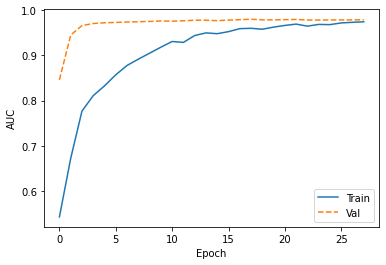

In [48]:
def plot_metrics(history):
    name = 'AUC'
    fig, ax = plt.subplots()
    ax.plot(history.epoch, history.history['auc'], label='Train')
    ax.plot(history.epoch, history.history['val_auc'],
           linestyle='--', label='Val')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('AUC')
    plt.legend()
plot_metrics(history)

In [49]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print(f"Legitimate Transactions Detected (True Negatives): {cm[0][0]}")
    print(f"Legitimate Transactions Incorrectly Detected (False Positives): {cm[0][1]}")
    print(f"Fraudulent Transactions Missed (False Negatives): {cm[1][0]}")
    print(f"Fraudulent Transactions Detected (True Positives): {cm[1][1]}")
    print(f"Total Fraudulent Transactions: {np.sum(cm[1])}")

Legitimate Transactions Detected (True Negatives): 2592
Legitimate Transactions Incorrectly Detected (False Positives): 17
Fraudulent Transactions Missed (False Negatives): 82
Fraudulent Transactions Detected (True Positives): 177
Total Fraudulent Transactions: 259


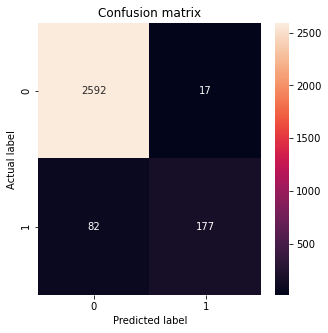

In [50]:
val_predictions = model.predict(val_features)
test_predictions = model.predict(test_features)

plot_cm(y_test, test_predictions)

In [51]:
f1_score(y_test, test_predictions>0.5)

0.781456953642384

In [52]:
val_predictions

array([[0.00228867],
       [0.00256282],
       [0.00452659],
       ...,
       [0.00315782],
       [0.00376287],
       [0.00363755]], dtype=float32)

In [53]:
weight_for_0 = (1 / neg) * (total)/2.0
weight_for_1 = (1 / pos) * (total)/2.0
class_weight = {0: weight_for_0, 1: weight_for_1}

print(weight_for_0)
print(weight_for_1)

0.5495448011499761
5.545938104448743


In [54]:
weighted_model = make_model()

weighted_history = weighted_model.fit(
    train_features,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, y_val),
    class_weight=class_weight,
    verbose=2
)

Epoch 1/100
5/5 - 0s - loss: 0.7274 - precision: 0.1092 - recall: 0.8791 - auc: 0.6415 - val_loss: 0.8860 - val_precision: 0.0906 - val_recall: 1.0000 - val_auc: 0.7691
Epoch 2/100
5/5 - 0s - loss: 0.6880 - precision: 0.1038 - recall: 0.9202 - auc: 0.6117 - val_loss: 0.8018 - val_precision: 0.0958 - val_recall: 0.9952 - val_auc: 0.9170
Epoch 3/100
5/5 - 0s - loss: 0.6422 - precision: 0.1203 - recall: 0.9166 - auc: 0.7155 - val_loss: 0.7032 - val_precision: 0.1390 - val_recall: 0.9807 - val_auc: 0.9430
Epoch 4/100
5/5 - 0s - loss: 0.6046 - precision: 0.1413 - recall: 0.8839 - auc: 0.7650 - val_loss: 0.6151 - val_precision: 0.2426 - val_recall: 0.9469 - val_auc: 0.9534
Epoch 5/100
5/5 - 0s - loss: 0.5666 - precision: 0.1675 - recall: 0.8875 - auc: 0.8081 - val_loss: 0.5421 - val_precision: 0.3415 - val_recall: 0.9469 - val_auc: 0.9599
Epoch 6/100
5/5 - 0s - loss: 0.5342 - precision: 0.1890 - recall: 0.8706 - auc: 0.8453 - val_loss: 0.4802 - val_precision: 0.4046 - val_recall: 0.9420 - va

Epoch 00048: early stopping


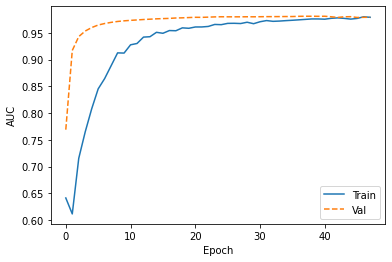

In [55]:
plot_metrics(weighted_history)

Legitimate Transactions Detected (True Negatives): 2463
Legitimate Transactions Incorrectly Detected (False Positives): 146
Fraudulent Transactions Missed (False Negatives): 24
Fraudulent Transactions Detected (True Positives): 235
Total Fraudulent Transactions: 259


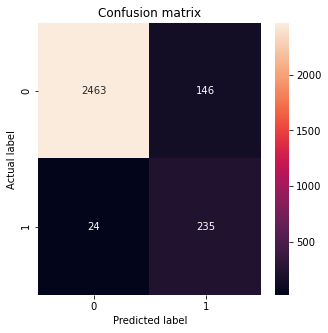

In [56]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
plot_cm(y_test, test_predictions_weighted)

In [57]:
f1_score(y_test, test_predictions_weighted>0.5)

0.7343750000000001